In [1]:
import pandas as pd
import numpy as np
import math

In [82]:
df = pd.read_csv('../Missing_Migrants_Global_Figures_allData.csv')

In [83]:
df.head()

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1,0,1,...,Central America,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-110.366453 31.650259),Northern America,NaN,5.0,http://humaneborders.info/
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1,0,1,...,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-111.73756 31.59713),Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1,0,1,...,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-113.01125 31.94026),Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,January,1,0,1,...,Central America,Violence,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...",POINT (-109.315632 31.506777),Northern America,Mexico condemns the use of force by a border p...,5.0,http://bit.ly/1qfIw00
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1,0,1,...,Northern Africa,Harsh environmental conditions / lack of adequ...,NaN,Border between Russia and Estonia,EUBusiness (Agence France-Presse),POINT (28 59.1551),Northern Europe,Sudanese migrant freezes to death in illegal E...,1.0,http://bit.ly/1rTFTjR


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11172 entries, 0 to 11171
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Main ID                              11172 non-null  object 
 1   Incident ID                          11172 non-null  object 
 2   Incident Type                        11172 non-null  object 
 3   Region of Incident                   11172 non-null  object 
 4   Website Date                         11157 non-null  object 
 5   Incident year                        11172 non-null  int64  
 6   Reported Month                       11172 non-null  object 
 7   Number of Dead                       11172 non-null  int64  
 8   Minimum Estimated Number of Missing  11172 non-null  int64  
 9   Total Number of Dead and Missing     11172 non-null  int64  
 10  Number of Survivors                  11172 non-null  int64  
 11  Number of Females           

In [85]:
df.isna().any()

Main ID                                False
Incident ID                            False
Incident Type                          False
Region of Incident                     False
Website Date                            True
Incident year                          False
Reported Month                         False
Number of Dead                         False
Minimum Estimated Number of Missing    False
Total Number of Dead and Missing       False
Number of Survivors                    False
Number of Females                      False
Number of Males                        False
Number of Children                     False
Country of Origin                       True
Region of Origin                        True
Cause of Death                         False
Migration route                         True
Location of death                      False
Information Source                      True
Coordinates                             True
UNSD Geographical Grouping              True
Article ti

In [86]:
df[(df['Migration route'].isna()) & (df['Coordinates'].isna())][['Location of death','Region of Incident','Coordinates']]

,Location of death,Region of Incident,Coordinates
10578,At kilometer 300 of the Cordoba-Veracruz highw...,Central America,NaN
10581,"Las Acacias, Cúcuta-Puerto Santander, Cúcuta, ...",South America,NaN


In [87]:
df[df['Country of Origin'].isna()][['Location of death','Region of Incident','Country of Origin','Region of Origin']]

,Location of death,Region of Incident,Country of Origin,Region of Origin
132,Boat drifting in Libyan waters,Mediterranean,NaN,Unknown
185,"Off the shore of al-Qarbouli, Libya",Mediterranean,NaN,Unknown
254,Multiple locations,Eastern Africa,NaN,Unknown
423,"Trafficking camps in Phang Nga province, Thailand",South-eastern Asia,NaN,South-eastern Asia
761,"Xaloztoc, Tlaxcala, Mexico",Central America,NaN,Latin America / Caribbean (P)
922,Pima Country Office of the Medical Examiner ju...,North America,NaN,Central America
965,"off the coast of Cesme, Izmir, Turkey, en rout...",Mediterranean,NaN,Western Asia
974,"All American Canal, CA near Calexico",North America,NaN,Central America
1003,"Sabha, Libya",Northern Africa,NaN,Eastern Africa (P)


In [88]:
df[df['Region of Origin'].isna()]

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL
10781,2022.MMP604,2022.MMP604,Incident,Mediterranean,2022-06-04,2022,June,1,0,1,...,NaN,Drowning,Central Mediterranean,"Remains washed ashore at Almutrid, West Zawiya...",IOM Libya,POINT (12.611113 32.79373156),Uncategorized,NaN,4.0,NaN


In [89]:
df['Region of Origin'].value_counts()

Latin America / Caribbean (P)                            1904
Unknown                                                  1558
Sub-Saharan Africa (P)                                   1435
Southern Asia                                            1380
Central America                                          1368
                                                         ... 
Sub-Saharan Africa (P), Western Africa, Middle Africa       1
Northern Africa, Western Africa, Middle Africa              1
Sub-Saharan Africa, Southern Asia                           1
Mixed, Northern Africa, Western Africa                      1
South America, Caribbean, South America (P)                 1
Name: Region of Origin, Length: 122, dtype: int64

In [90]:
df['Country of Origin'].value_counts()

Unknown                                                                             6555
Afghanistan                                                                         1198
Mexico                                                                               622
Syrian Arab Republic                                                                 290
Honduras                                                                             282
                                                                                    ... 
Unknown, Mali, Côte d'Ivoire                                                           1
Mixed, Bangladesh                                                                      1
Nigeria, Mali, Senegal, Guinea, Côte d'Ivoire, Central African Republic, Liberia       1
Georgia                                                                                1
Kyrgyzstan                                                                             1
Name: Country of Orig

In [91]:
df[df['Coordinates'].isna()]['Migration route']

231          Central Mediterranean
256      US-Mexico border crossing
257      US-Mexico border crossing
258      US-Mexico border crossing
259      US-Mexico border crossing
260      US-Mexico border crossing
261      US-Mexico border crossing
262      US-Mexico border crossing
263      US-Mexico border crossing
264      US-Mexico border crossing
265      US-Mexico border crossing
267      US-Mexico border crossing
270      US-Mexico border crossing
271      US-Mexico border crossing
272      US-Mexico border crossing
273      US-Mexico border crossing
274      US-Mexico border crossing
275      US-Mexico border crossing
276      US-Mexico border crossing
277      US-Mexico border crossing
278      US-Mexico border crossing
279      US-Mexico border crossing
280      US-Mexico border crossing
281      US-Mexico border crossing
282      US-Mexico border crossing
283      US-Mexico border crossing
284      US-Mexico border crossing
285      US-Mexico border crossing
286      US-Mexico b

In [92]:
df['Migration route'].value_counts()

US-Mexico border crossing                                2978
Sahara Desert crossing                                   1963
Afghanistan to Iran                                      1063
Central Mediterranean                                     909
Western Mediterranean                                     537
Eastern Mediterranean                                     297
Western Africa / Atlantic route to the Canary Islands     190
Western Balkans                                           172
Türkiye-Europe land route                                 129
Syria to Türkiye                                          128
English Channel to the UK                                 127
Horn of Africa to Yemen crossing                           65
Darien Gap                                                 47
Dominican Republic to Puerto Rico                          35
Iran to Türkiye                                            33
Italy to France                                            32
Caribbea

In [93]:
df['UNSD Geographical Grouping'].value_counts()

Northern America      2399
Uncategorized         1989
Northern Africa       1755
Southern Asia         1170
Central America       1137
Western Africa         918
Eastern Africa         403
Western Asia           297
Southern Europe        291
South-eastern Asia     214
South America          185
Western Europe         148
Caribbean               93
Middle Africa           73
Eastern Europe          61
Northern Europe         20
Southern Africa          9
Eastern Asia             8
Central Asia             1
Name: UNSD Geographical Grouping, dtype: int64

In [94]:
df[df['UNSD Geographical Grouping'].isna()]

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL
5356,2018.MMP02190,2018.MMP02190,Incident,North America,2018-02-17,2018,February,1,0,1,...,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,NaN,POINT (-113.367348 33.061615),NaN,NaN,NaN,NaN


In [95]:
def get_xy(point):
    if pd.notnull(point):
        arr = point.replace('(','').replace(')','').split(' ')
        return pd.Series({   # returns a row with column labels B and C
            "X": float(arr[1]),
            "Y": float(arr[2])
        })
    else:
        return pd.Series({   # returns a row with column labels B and C
            "X": None,
            "Y": None
        })

In [96]:
df['Coordinates'].iloc[0].replace('(','').replace(')','').split(' ')

['POINT', '-110.366453', '31.650259']

In [97]:
df = pd.concat([df, df["Coordinates"].apply(lambda x: get_xy(x))], axis=1)

In [98]:
df

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL,X,Y
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1,0,1,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-110.366453 31.650259),Northern America,NaN,5.0,http://humaneborders.info/,-110.366453,31.650259
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1,0,1,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-111.73756 31.59713),Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN,-111.737560,31.597130
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1,0,1,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-113.01125 31.94026),Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN,-113.011250,31.940260
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,January,1,0,1,...,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...",POINT (-109.315632 31.506777),Northern America,Mexico condemns the use of force by a border p...,5.0,http://bit.ly/1qfIw00,-109.315632,31.506777
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1,0,1,...,NaN,Border between Russia and Estonia,EUBusiness (Agence France-Presse),POINT (28 59.1551),Northern Europe,Sudanese migrant freezes to death in illegal E...,1.0,http://bit.ly/1rTFTjR,28.000000,59.155100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11167,2022.MMP996,2022.MMP996,Incident,Europe,2022-08-11,2022,August,2,0,2,...,Türkiye-Europe land route,"Bulgarian side of the border near Topçular, Ko...",IOM Edirne Türkiye,POINT (27.160306 42.06719),Eastern Europe,NaN,4.0,NaN,27.160306,42.067190
11168,2022.MMP997,2022.MMP997,Incident,Europe,2022-08-13,2022,August,1,0,1,...,Türkiye-Europe land route,"Greek side of the border, Evros River, near Ra...",IOM Edirne Türkiye,POINT (26.464278 41.288319),Western Asia,NaN,4.0,NaN,26.464278,41.288319
11169,2022.MMP998,2022.MMP998,Incident,Europe,2022-08-11,2022,August,1,0,1,...,Türkiye-Europe land route,"Unspecified location in the woods in Greece, n...",IOM Edirne Türkiye,POINT (25.969797 41.13261),Southern Europe,NaN,4.0,NaN,25.969797,41.132610
11170,2022.MMP999,2022.MMP999,Incident,Western Asia,2022-08-20,2022,August,1,0,1,...,Türkiye-Europe land route,Unspecified location between the Evros River a...,IOM Edirne Türkiye,POINT (26.312146 41.08284),Western Asia,NaN,4.0,NaN,26.312146,41.082840


In [213]:
def dist(p1, p2):
    """ Distance between two points, format: (x, y) """
    return np.sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2)

In [283]:
def get_closer_coor(dfe,row):
    p = (row['X'], row['Y'])
    x = np.sqrt((dfe['X']- p[0])**2 + (dfe['Y']-p[1])**2)
    return dfe.iloc[x.argsort().iloc[0]]

In [240]:
df2 = df[(df['Migration route'].isna()) & (~df['Coordinates'].isna())]

In [241]:
#df2['Migration route'] = df2.apply(lambda x: get_closer_coor(df[~df['Coordinates'].isna()],x),axis=1)

In [249]:
lists = []
for i,r in df2.iterrows():
    migration = get_closer_coor(df[(~df['Migration route'].isna())& (~df['Coordinates'].isna())],r)
    lists.append((i,migration))

In [262]:
df2.iloc[0]['Migration route'] = "Belarus-EU border"

In [267]:
df2.at[4,'Migration route'] ="Belarus-EU border"

In [268]:
df2.at[4,'Migration route']

'Belarus-EU border'

In [269]:
for i,m in lists:
    df.at[i,'Migration route'] = m

Belarus-EU border Belarus-EU border
Caribbean to US Caribbean to US
Sahara Desert crossing Sahara Desert crossing
Dominican Republic to Puerto Rico Dominican Republic to Puerto Rico
Sahara Desert crossing Sahara Desert crossing
US-Mexico border crossing US-Mexico border crossing
Sahara Desert crossing Sahara Desert crossing
DRC to Uganda DRC to Uganda
US-Mexico border crossing US-Mexico border crossing
Comoros to Mayotte Comoros to Mayotte
US-Mexico border crossing US-Mexico border crossing
US-Mexico border crossing US-Mexico border crossing
US-Mexico border crossing US-Mexico border crossing
Haiti to Dominican Republic Haiti to Dominican Republic
Sahara Desert crossing Sahara Desert crossing
US-Mexico border crossing US-Mexico border crossing
US-Mexico border crossing US-Mexico border crossing
Sahara Desert crossing Sahara Desert crossing
US-Mexico border crossing US-Mexico border crossing
US-Mexico border crossing US-Mexico border crossing
Afghanistan to Iran Afghanistan to Iran
US-M

Horn of Africa to Yemen crossing Horn of Africa to Yemen crossing
US-Mexico border crossing US-Mexico border crossing
US-Mexico border crossing US-Mexico border crossing
Sahara Desert crossing Sahara Desert crossing
Sahara Desert crossing Sahara Desert crossing
Sahara Desert crossing Sahara Desert crossing
Sahara Desert crossing Sahara Desert crossing
Sahara Desert crossing Sahara Desert crossing
Sahara Desert crossing Sahara Desert crossing
Sahara Desert crossing Sahara Desert crossing
US-Mexico border crossing US-Mexico border crossing
Western Africa / Atlantic route to the Canary Islands Western Africa / Atlantic route to the Canary Islands
Sahara Desert crossing Sahara Desert crossing
Sahara Desert crossing Sahara Desert crossing
Sahara Desert crossing Sahara Desert crossing
Sahara Desert crossing Sahara Desert crossing
Sahara Desert crossing Sahara Desert crossing
Sahara Desert crossing Sahara Desert crossing
Afghanistan to Iran Afghanistan to Iran
Sahara Desert crossing Sahara De

Darien Gap Darien Gap
US-Mexico border crossing US-Mexico border crossing
US-Mexico border crossing US-Mexico border crossing
Türkiye-Europe land route Türkiye-Europe land route
Sahara Desert crossing Sahara Desert crossing
US-Mexico border crossing US-Mexico border crossing
US-Mexico border crossing US-Mexico border crossing
Darien Gap Darien Gap
Darien Gap Darien Gap
US-Mexico border crossing US-Mexico border crossing
Iran to Türkiye Iran to Türkiye
US-Mexico border crossing US-Mexico border crossing
US-Mexico border crossing US-Mexico border crossing
Darien Gap Darien Gap
US-Mexico border crossing US-Mexico border crossing
Türkiye-Europe land route Türkiye-Europe land route
US-Mexico border crossing US-Mexico border crossing
Sahara Desert crossing Sahara Desert crossing
Sahara Desert crossing Sahara Desert crossing
Darien Gap Darien Gap
Eastern Mediterranean Eastern Mediterranean
Horn of Africa to Yemen crossing Horn of Africa to Yemen crossing
Horn of Africa to Yemen crossing Horn 

In [270]:
df[df['Migration route'].isna()]

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL,X,Y
10578,2022.MMP1002,2022.MMP1002,Incident,Central America,2022-08-18,2022,August,1,0,1,...,NaN,At kilometer 300 of the Cordoba-Veracruz highw...,"Vanguardia de Veracruz,El Mundo",NaN,Central America,Se mata migrante cubana en mortal volcadura!,3.0,"https://archive.ph/ApQpJ,https://archive.ph/OhaC6",NaN,NaN
10581,2022.MMP1005,2022.MMP1005,Incident,South America,2022-08-17,2022,August,1,0,1,...,NaN,"Las Acacias, Cúcuta-Puerto Santander, Cúcuta, ...",Reporte Confidencial Venezuela,NaN,South America,Asesinaron a joven venezolano en Cúcuta,1.0,https://archive.ph/6sCeE,NaN,NaN


In [242]:
get_closer_coor(df[(~df['Migration route'].isna())& (~df['Coordinates'].isna())],df2.iloc[1])

'Caribbean to US'

In [273]:
df.drop(['Article title','Source Quality','URL'],axis=1,inplace=True)

In [277]:
df.isna().any()

Main ID                                False
Incident ID                            False
Incident Type                          False
Region of Incident                     False
Website Date                            True
Incident year                          False
Reported Month                         False
Number of Dead                         False
Minimum Estimated Number of Missing    False
Total Number of Dead and Missing       False
Number of Survivors                    False
Number of Females                      False
Number of Males                        False
Number of Children                     False
Country of Origin                       True
Region of Origin                        True
Cause of Death                         False
Migration route                         True
Location of death                      False
Information Source                      True
Coordinates                             True
UNSD Geographical Grouping              True
X         

In [280]:
df['UNSD Geographical Grouping'].value_counts()

Northern America      2399
Uncategorized         1989
Northern Africa       1755
Southern Asia         1170
Central America       1137
Western Africa         918
Eastern Africa         403
Western Asia           297
Southern Europe        291
South-eastern Asia     214
South America          185
Western Europe         148
Caribbean               93
Middle Africa           73
Eastern Europe          61
Northern Europe         20
Southern Africa          9
Eastern Asia             8
Central Asia             1
Name: UNSD Geographical Grouping, dtype: int64

In [281]:
df[df['UNSD Geographical Grouping'].isna()]

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Country of Origin,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,X,Y
5356,2018.MMP02190,2018.MMP02190,Incident,North America,2018-02-17,2018,February,1,0,1,...,Unknown,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,NaN,POINT (-113.367348 33.061615),NaN,-113.367348,33.061615


In [284]:
get_closer_coor(df[(~df['Migration route'].isna())& (~df['Coordinates'].isna()) & (~df['UNSD Geographical Grouping'].isna())],df.loc[5356])

Main ID                                                                    2016.MMP01587
Incident ID                                                                2016.MMP01587
Incident Type                                                                   Incident
Region of Incident                                                         North America
Website Date                                                                  2016-06-20
Incident year                                                                       2016
Reported Month                                                                      June
Number of Dead                                                                         1
Minimum Estimated Number of Missing                                                    0
Total Number of Dead and Missing                                                       1
Number of Survivors                                                                    0
Number of Females    

In [285]:
df.at[5356,'UNSD Geographical Grouping'] = 'Northern America'

In [286]:
df.at[5356,'UNSD Geographical Grouping']

'Northern America'

In [287]:
df.isna().any()

Main ID                                False
Incident ID                            False
Incident Type                          False
Region of Incident                     False
Website Date                            True
Incident year                          False
Reported Month                         False
Number of Dead                         False
Minimum Estimated Number of Missing    False
Total Number of Dead and Missing       False
Number of Survivors                    False
Number of Females                      False
Number of Males                        False
Number of Children                     False
Country of Origin                       True
Region of Origin                        True
Cause of Death                         False
Migration route                         True
Location of death                      False
Information Source                      True
Coordinates                             True
UNSD Geographical Grouping             False
X         

In [291]:
df[df['Coordinates'].isna()]['Migration route'].value_counts()

US-Mexico border crossing    36
Central Mediterranean         1
Caribbean to US               1
Name: Migration route, dtype: int64

In [292]:
mi_rou_comm_cor = df.groupby(['Migration route'])['Coordinates'].agg(pd.Series.mode)

In [318]:
df3 = df[(df['Coordinates'].isna()) & (~df['Migration route'].isna())]

In [313]:
mi_rou_comm_cor[df3['Migration route']].values.shape

(38,)

In [321]:
df3.index

Int64Index([  231,   256,   257,   258,   259,   260,   261,   262,   263,
              264,   265,   267,   270,   271,   272,   273,   274,   275,
              276,   277,   278,   279,   280,   281,   282,   283,   284,
              285,   286,   287,   288,   289,   290,   291,   292,   293,
            10577, 10580],
           dtype='int64')

In [322]:
df.loc[df3.index,'Coordinates'] = mi_rou_comm_cor[df3['Migration route']].values

In [323]:
df[df['Coordinates'].isna()]

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Country of Origin,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,X,Y
10578,2022.MMP1002,2022.MMP1002,Incident,Central America,2022-08-18,2022,August,1,0,1,...,Cuba,Caribbean,Vehicle accident / death linked to hazardous t...,NaN,At kilometer 300 of the Cordoba-Veracruz highw...,"Vanguardia de Veracruz,El Mundo",NaN,Central America,NaN,NaN
10581,2022.MMP1005,2022.MMP1005,Incident,South America,2022-08-17,2022,August,1,0,1,...,Venezuela (Bolivarian Republic of),South America,Violence,NaN,"Las Acacias, Cúcuta-Puerto Santander, Cúcuta, ...",Reporte Confidencial Venezuela,NaN,South America,NaN,NaN


In [326]:
df['Coordinates'].dropna()

0          POINT (-110.366453 31.650259)
1            POINT (-111.73756 31.59713)
2            POINT (-113.01125 31.94026)
3          POINT (-109.315632 31.506777)
4                     POINT (28 59.1551)
                      ...               
11167         POINT (27.160306 42.06719)
11168        POINT (26.464278 41.288319)
11169         POINT (25.969797 41.13261)
11170         POINT (26.312146 41.08284)
11171    POINT (12.93933141 22.73438554)
Name: Coordinates, Length: 11170, dtype: object

In [327]:
df = df.dropna(subset=['Coordinates'])

In [329]:
df.isna().any()

Main ID                                False
Incident ID                            False
Incident Type                          False
Region of Incident                     False
Website Date                            True
Incident year                          False
Reported Month                         False
Number of Dead                         False
Minimum Estimated Number of Missing    False
Total Number of Dead and Missing       False
Number of Survivors                    False
Number of Females                      False
Number of Males                        False
Number of Children                     False
Country of Origin                       True
Region of Origin                        True
Cause of Death                         False
Migration route                        False
Location of death                      False
Information Source                      True
Coordinates                            False
UNSD Geographical Grouping             False
X         

In [333]:
df4 = df[df['X'].isna()]

In [335]:
df4 = df4['Coordinates'].apply(lambda x: get_xy(x))

In [336]:
df4

,X,Y
231,14.498815,34.253372
256,-99.433270,24.215586
257,-99.433270,24.215586
258,-99.433270,24.215586
259,-99.433270,24.215586
260,-99.433270,24.215586
261,-99.433270,24.215586
262,-99.433270,24.215586
263,-99.433270,24.215586
264,-99.433270,24.215586


In [339]:
df.loc[df4.index,'X'] = df4['X'].values

In [340]:
df.loc[df4.index,'Y'] = df4['Y'].values

In [341]:
df[df['X'].isna()]

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Country of Origin,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,X,Y


In [342]:
df.isna().any()

Main ID                                False
Incident ID                            False
Incident Type                          False
Region of Incident                     False
Website Date                            True
Incident year                          False
Reported Month                         False
Number of Dead                         False
Minimum Estimated Number of Missing    False
Total Number of Dead and Missing       False
Number of Survivors                    False
Number of Females                      False
Number of Males                        False
Number of Children                     False
Country of Origin                       True
Region of Origin                        True
Cause of Death                         False
Migration route                        False
Location of death                      False
Information Source                      True
Coordinates                            False
UNSD Geographical Grouping             False
X         

In [344]:
df['Region of Origin'].fillna('Unknown',inplace=True)

C:\Users\srodriguezb\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [345]:
df['Country of Origin'].fillna('Unknown',inplace=True)

In [346]:
df.isna().any()

Main ID                                False
Incident ID                            False
Incident Type                          False
Region of Incident                     False
Website Date                            True
Incident year                          False
Reported Month                         False
Number of Dead                         False
Minimum Estimated Number of Missing    False
Total Number of Dead and Missing       False
Number of Survivors                    False
Number of Females                      False
Number of Males                        False
Number of Children                     False
Country of Origin                      False
Region of Origin                       False
Cause of Death                         False
Migration route                        False
Location of death                      False
Information Source                      True
Coordinates                            False
UNSD Geographical Grouping             False
X         

In [350]:
df[df['Website Date'].isna()]

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Country of Origin,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,X,Y
7126,2019.MMP01859,2019.MMP01859,Incident,Southern Asia,NaN,2019,January,1,0,1,...,Afghanistan,Southern Asia,Vehicle accident / death linked to hazardous t...,Afghanistan to Iran,"Tehran, Iran",IOM Afghanistan,POINT (51.144003 35.732116),Southern Asia,51.144003,35.732116
8132,2020.MMP01074,2020.MMP01074,Incident,Central America,NaN,2020,February,1,0,1,...,Honduras,Central America,Mixed or unknown,US-Mexico border crossing,"El Ceibo, Tabasco, Mexico",Instituto Nacional de Migración (Grupos Beta),POINT (-91.0000001 17.2666669),Central America,-91.000000,17.266667
8133,2020.MMP01075,2020.MMP01075,Incident,Central America,NaN,2020,March,2,0,2,...,Unknown,Latin America / Caribbean (P),Drowning,US-Mexico border crossing,"Rio Bravo in Tamaulipas, Mexico",Instituto Nacional de Migración (Grupos Beta),POINT (-98.07263018 26.03243967),Central America,-98.072630,26.032440
8138,2020.MMP01080,2020.MMP01080,Incident,Central America,NaN,2020,May,1,0,1,...,Unknown,Latin America / Caribbean (P),Drowning,US-Mexico border crossing,"Rio Bravo in Tamaulipas, Mexico",Instituto Nacional de Migración (Grupos Beta),POINT (-98.04688097 26.0393516),Central America,-98.046881,26.039352
8142,2020.MMP01084,2020.MMP01084,Incident,Central America,NaN,2020,July,1,0,1,...,Unknown,Latin America / Caribbean (P),Drowning,US-Mexico border crossing,"Rio Bravo in Coahuila, Mexico",Instituto Nacional de Migración (Grupos Beta),POINT (-100.51621224 28.65486506),Central America,-100.516212,28.654865
8145,2020.MMP01088,2020.MMP01088,Incident,Central America,NaN,2020,August,1,0,1,...,El Salvador,Central America,Mixed or unknown,US-Mexico border crossing,"In a hospital in Chiapas, Mexico",Instituto Nacional de Migración (Grupos Beta),POINT (-93.1292353 16.7569318),Central America,-93.129235,16.756932
8146,2020.MMP01089,2020.MMP01089,Incident,Central America,NaN,2020,August,1,0,1,...,El Salvador,Central America,Mixed or unknown,US-Mexico border crossing,"In a hospital in Chiapas, Mexico",Instituto Nacional de Migración (Grupos Beta),POINT (-93.1292353 16.7569318),Central America,-93.129235,16.756932
8147,2020.MMP01090,2020.MMP01090,Incident,Central America,NaN,2020,August,1,0,1,...,Mexico,Central America,Drowning,US-Mexico border crossing,"Rio Bravo in Tamaulipas, Mexico",Instituto Nacional de Migración (Grupos Beta),POINT (-98.17322374 26.05415737),Central America,-98.173224,26.054157
8150,2020.MMP01093,2020.MMP01093,Incident,Central America,NaN,2020,September,1,0,1,...,Haiti,Caribbean,Mixed or unknown,US-Mexico border crossing,"In a hospital in Chiapas, Mexico",Instituto Nacional de Migración (Grupos Beta),POINT (-93.1292353 16.7569318),Central America,-93.129235,16.756932
8151,2020.MMP01094,2020.MMP01094,Incident,Central America,NaN,2020,September,1,0,1,...,Unknown,Latin America / Caribbean (P),Drowning,US-Mexico border crossing,"Rio Bravo in Tamaulipas, Mexico",Instituto Nacional de Migración (Grupos Beta),POINT (-98.25150133 26.06896127),Central America,-98.251501,26.068961


In [349]:
df[['Website Date','Incident year','Reported Month']]

,Website Date,Incident year,Reported Month
0,2014-01-06,2014,January
1,2014-01-12,2014,January
2,2014-01-14,2014,January
3,2014-01-16,2014,January
4,2014-01-16,2014,January
...,...,...,...
11167,2022-08-11,2022,August
11168,2022-08-13,2022,August
11169,2022-08-11,2022,August
11170,2022-08-20,2022,August


In [348]:
df['Information Source']

0        Pima County Office of the Medical Examiner (PC...
1        Pima County Office of the Medical Examiner (PC...
2        Pima County Office of the Medical Examiner (PC...
3        Ministry of Foreign Affairs Mexico, Pima Count...
4                        EUBusiness (Agence France-Presse)
                               ...                        
11167                                   IOM Edirne Türkiye
11168                                   IOM Edirne Türkiye
11169                                   IOM Edirne Türkiye
11170                                   IOM Edirne Türkiye
11171                                                 MHub
Name: Information Source, Length: 11170, dtype: object

In [351]:
df.drop(['Website Date'],axis =1 ,inplace=True)

C:\Users\srodriguezb\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [353]:
df[df['Information Source'].isna()]['Information Source']

62      NaN
465     NaN
545     NaN
724     NaN
3113    NaN
3141    NaN
3977    NaN
4121    NaN
5356    NaN
5476    NaN
5589    NaN
5729    NaN
6146    NaN
6979    NaN
8160    NaN
Name: Information Source, dtype: object

In [355]:
df.to_csv('../Missing_Migrants_Global_Figures_filtered.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../Missing_Migrants_Global_Figures_filtered.csv')

In [5]:
df[['Incident year','Reported Month']].value_counts()

Incident year  Reported Month
2021           June              202
2019           July              182
2018           June              177
2020           September         167
2021           September         166
                                ... 
2014           December           20
               January            17
2015           February           17
2014           November           16
               February           16
Length: 104, dtype: int64

In [6]:
df['Migration route'].value_counts()

US-Mexico border crossing                                3516
Sahara Desert crossing                                   2822
Afghanistan to Iran                                      1115
Central Mediterranean                                    1022
Western Mediterranean                                     574
Eastern Mediterranean                                     323
Horn of Africa to Yemen crossing                          292
Darien Gap                                                222
Western Balkans                                           215
Western Africa / Atlantic route to the Canary Islands     206
Türkiye-Europe land route                                 156
English Channel to the UK                                 143
Syria to Türkiye                                          136
Comoros to Mayotte                                         82
Caribbean to US                                            73
Iran to Türkiye                                            46
Dominica

In [7]:
df.columns

Index(['Unnamed: 0', 'Main ID', 'Incident ID', 'Incident Type',
       'Region of Incident', 'Incident year', 'Reported Month',
       'Number of Dead', 'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Country of Origin', 'Region of Origin', 'Cause of Death',
       'Migration route', 'Location of death', 'Information Source',
       'Coordinates', 'UNSD Geographical Grouping', 'X', 'Y'],
      dtype='object')

In [29]:
df.groupby(['Migration route'])['Total Number of Dead and Missing'].sum()

Migration route
Afghanistan to Iran                                       1405
Belarus-EU border                                           31
Caribbean to US                                            445
Central Mediterranean                                    20046
Comoros to Mayotte                                         510
DRC to Uganda                                              320
Darien Gap                                                 489
Dominican Republic to Puerto Rico                          317
Eastern Mediterranean                                     2078
English Channel to the UK                                  220
Haiti to Dominican Republic                                237
Horn of Africa to Yemen crossing                          1434
Iran to Türkiye                                            226
Italy to France                                             36
Sahara Desert crossing                                    9675
Syria to Türkiye                       

In [30]:
df.groupby(['Migration route'])['Country of Origin'].agg(pd.Series.mode)

Migration route
Afghanistan to Iran                                                             Afghanistan
Belarus-EU border                                                                      Iraq
Caribbean to US                                                                        Cuba
Central Mediterranean                                                               Unknown
Comoros to Mayotte                                                                  Unknown
DRC to Uganda                                                                       Unknown
Darien Gap                                               Venezuela (Bolivarian Republic of)
Dominican Republic to Puerto Rico                                        Dominican Republic
Eastern Mediterranean                                                               Unknown
English Channel to the UK                                                           Unknown
Haiti to Dominican Republic                                     

In [31]:
df.groupby(['Migration route'])['Cause of Death'].agg(pd.Series.mode)

Migration route
Afghanistan to Iran                                      Vehicle accident / death linked to hazardous t...
Belarus-EU border                                        Harsh environmental conditions / lack of adequ...
Caribbean to US                                                                                   Drowning
Central Mediterranean                                                                             Drowning
Comoros to Mayotte                                                                                Drowning
DRC to Uganda                                                                             Mixed or unknown
Darien Gap                                                                                        Violence
Dominican Republic to Puerto Rico                                                                 Drowning
Eastern Mediterranean                                                                             Drowning
English Channel to th

In [32]:
df[['Migration route','Cause of Death']].value_counts()

Migration route            Cause of Death                                                                  
US-Mexico border crossing  Mixed or unknown                                                                    1422
Sahara Desert crossing     Mixed or unknown                                                                    1011
US-Mexico border crossing  Drowning                                                                             791
Central Mediterranean      Drowning                                                                             700
US-Mexico border crossing  Harsh environmental conditions / lack of adequate shelter, food, water               567
                                                                                                               ... 
Iran to Türkiye            Mixed or unknown                                                                       1
Ukraine to Europe          Harsh environmental conditions / lack of adequate she

In [33]:
df['Reported Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [8]:
season_dict = {'Winter':{'December','January','February'},'Autumn':{'September','October','November'},'Summer':{'June','July','August'},'Spring':{'March','April','May'}}

In [9]:
'December' in season_dict['Winter']

True

In [10]:
def get_season(x):
    for key, val in season_dict.items():
        if x in val:
            return key

In [11]:
get_season('September')

'Autumn'

In [12]:
df['Season'] = df['Reported Month'].apply(lambda x: get_season(x) )

In [13]:
df['Season'].value_counts()

Summer    3106
Autumn    2912
Winter    2644
Spring    2508
Name: Season, dtype: int64

In [14]:
df.to_csv('../Missing_Migrants_Global_Figures_filtered.csv',index=False)

In [40]:
df.groupby(['Migration route'])['Season'].agg(pd.Series.mode)

Migration route
Afghanistan to Iran                                      Autumn
Belarus-EU border                                        Autumn
Caribbean to US                                          Summer
Central Mediterranean                                    Summer
Comoros to Mayotte                                       Autumn
DRC to Uganda                                            Autumn
Darien Gap                                               Summer
Dominican Republic to Puerto Rico                        Summer
Eastern Mediterranean                                    Autumn
English Channel to the UK                                Autumn
Haiti to Dominican Republic                              Winter
Horn of Africa to Yemen crossing                         Summer
Iran to Türkiye                                          Spring
Italy to France                                          Winter
Sahara Desert crossing                                   Autumn
Syria to Türkiye        

In [41]:
df1 = df.groupby(['Migration route','Season','Incident year'])['Total Number of Dead and Missing'].sum().reset_index(name='count')

In [42]:
df1['Migration route'].unique()

array(['Afghanistan to Iran', 'Belarus-EU border', 'Caribbean to US',
       'Central Mediterranean', 'Comoros to Mayotte', 'DRC to Uganda',
       'Darien Gap', 'Dominican Republic to Puerto Rico',
       'Eastern Mediterranean', 'English Channel to the UK',
       'Haiti to Dominican Republic', 'Horn of Africa to Yemen crossing',
       'Iran to Türkiye', 'Italy to France', 'Sahara Desert crossing',
       'Syria to Türkiye', 'Türkiye-Europe land route',
       'US-Mexico border crossing', 'Ukraine to Europe',
       'Venezuela to Caribbean',
       'Western Africa / Atlantic route to the Canary Islands',
       'Western Balkans', 'Western Mediterranean'], dtype=object)

In [43]:
df1[df1['Migration route'] == 'US-Mexico border crossing']

,Migration route,Season,Incident year,count
418,US-Mexico border crossing,Autumn,2014,196
419,US-Mexico border crossing,Autumn,2015,155
420,US-Mexico border crossing,Autumn,2016,231
421,US-Mexico border crossing,Autumn,2017,97
422,US-Mexico border crossing,Autumn,2018,116
423,US-Mexico border crossing,Autumn,2019,115
424,US-Mexico border crossing,Autumn,2020,149
425,US-Mexico border crossing,Autumn,2021,220
426,US-Mexico border crossing,Spring,2014,60
427,US-Mexico border crossing,Spring,2015,70


In [122]:
def plot_deaths_season(m_route,df):
    dft = df[df['Migration route'] == m_route]
    sns.set(rc={"figure.figsize":(10, 5)})

    sns.lineplot(data=dft,x='Incident year',y='count',hue='Season').set(title=f"Deaths per Season in {m_route}")

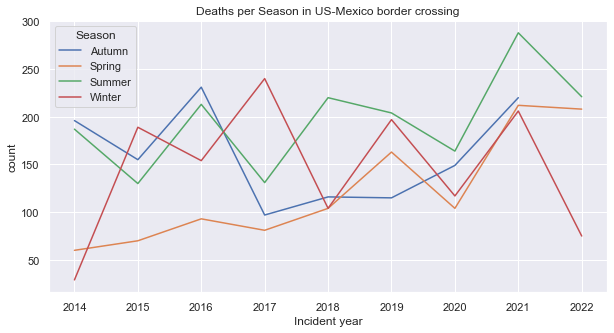

In [123]:
plot_deaths_season('US-Mexico border crossing',df1)

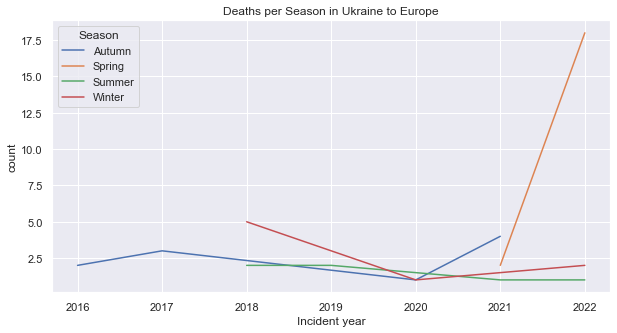

In [124]:
plot_deaths_season('Ukraine to Europe',df1)

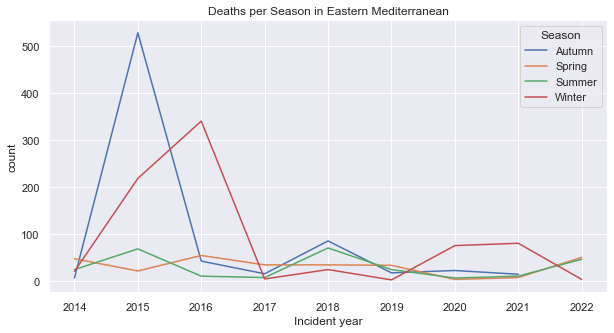

In [126]:
plot_deaths_season('Eastern Mediterranean',df1)

In [61]:
df[['Migration route','Cause of Death']].value_counts().reset_index(name='count')

,Migration route,Cause of Death,count
0,US-Mexico border crossing,Mixed or unknown,1422
1,Sahara Desert crossing,Mixed or unknown,1011
2,US-Mexico border crossing,Drowning,791
3,Central Mediterranean,Drowning,700
4,US-Mexico border crossing,Harsh environmental conditions / lack of adequ...,567
...,...,...,...
156,Iran to Türkiye,Mixed or unknown,1
157,Ukraine to Europe,Harsh environmental conditions / lack of adequ...,1
158,Venezuela to Caribbean,Harsh environmental conditions / lack of adequ...,1
159,Eastern Mediterranean,Harsh environmental conditions / lack of adequ...,1


In [117]:
df2 = df.groupby(['Migration route','Cause of Death'])['Total Number of Dead and Missing'].sum().reset_index(name='Total Number of Dead and Missing')

In [118]:
df2

,Migration route,Cause of Death,Total Number of Dead and Missing
0,Afghanistan to Iran,Accidental death,321
1,Afghanistan to Iran,Drowning,7
2,Afghanistan to Iran,Harsh environmental conditions / lack of adequ...,32
3,Afghanistan to Iran,Mixed or unknown,48
4,Afghanistan to Iran,Sickness / lack of access to adequate healthcare,154
...,...,...,...
156,Western Mediterranean,Harsh environmental conditions / lack of adequ...,35
157,Western Mediterranean,Mixed or unknown,173
158,Western Mediterranean,Sickness / lack of access to adequate healthcare,9
159,Western Mediterranean,Vehicle accident / death linked to hazardous t...,54


In [119]:
def plot_deaths_cause(m_route,df):
    dft = df[df['Migration route'] == m_route].sort_values(by='Total Number of Dead and Missing',ascending=False)
    sns.set(rc={"figure.figsize":(12, 5)})

    fig = sns.barplot(data=dft,x='Cause of Death',y='Total Number of Dead and Missing')
    fig.set(title=f"Cause of Death in {m_route}")
    fig.set_xticklabels(fig.get_xticklabels(), rotation=30, horizontalalignment='right')
    fig.patches[0].set_facecolor('salmon')
    for i in range(1,len(fig.patches)):
        fig.patches[i].set_facecolor('grey')
    plt.show()

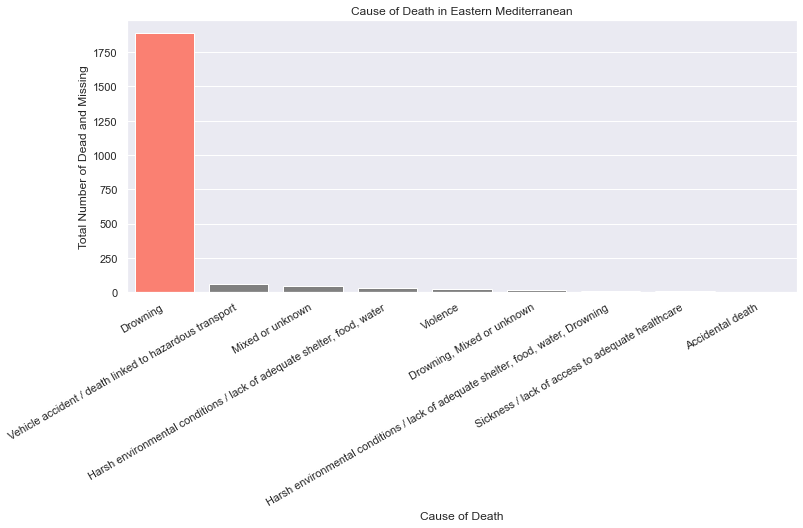

In [120]:
plot_deaths_cause('Eastern Mediterranean',df2)

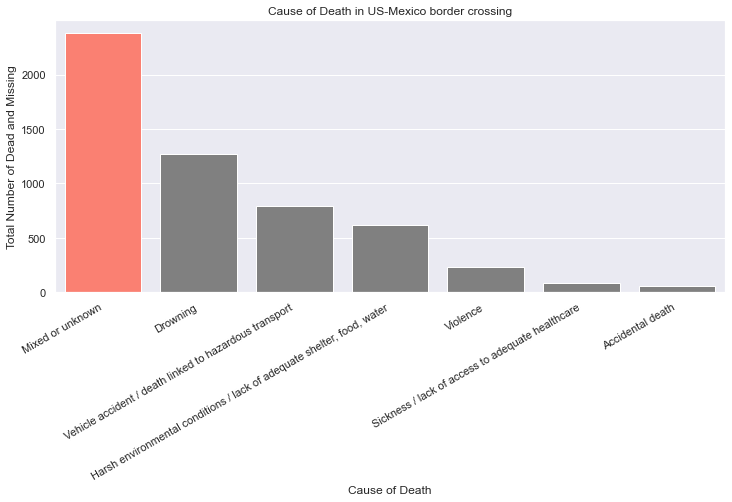

In [121]:
plot_deaths_cause('US-Mexico border crossing',df2)

In [128]:
df.columns

Index(['Unnamed: 0', 'Main ID', 'Incident ID', 'Incident Type',
       'Region of Incident', 'Incident year', 'Reported Month',
       'Number of Dead', 'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Country of Origin', 'Region of Origin', 'Cause of Death',
       'Migration route', 'Location of death', 'Information Source',
       'Coordinates', 'UNSD Geographical Grouping', 'X', 'Y', 'Season'],
      dtype='object')

In [131]:
df['Number of Survivors'].describe()

count    11170.000000
mean         6.652820
std         44.271662
min         -2.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1950.000000
Name: Number of Survivors, dtype: float64

In [136]:
df[df['Number of Survivors'] > 1000][['Number of Survivors','Total Number of Dead and Missing']]

,Number of Survivors,Total Number of Dead and Missing
1646,1950,2
1949,1050,1


In [17]:
m_route = df['Migration route'].unique().tolist()[:3]
cause = df['Cause of Death'].unique().tolist()[:3]

In [27]:
dft = df[(df['Migration route'].isin(m_route)) & (df['Cause of Death'].isin(cause))]

In [26]:
df[(df['Migration route'].isin( m_route)) & (df['Cause of Death'].isin(cause))]

,Unnamed: 0,Main ID,Incident ID,Incident Type,Region of Incident,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,X,Y,Season
0,0,2014.MMP00001,2014.MMP00001,Incident,North America,2014,January,1,0,1,...,Central America,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-110.366453 31.650259),Northern America,-110.366453,31.650259,Winter
1,1,2014.MMP00002,2014.MMP00002,Incident,North America,2014,January,1,0,1,...,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-111.73756 31.59713),Northern America,-111.737560,31.597130,Winter
2,2,2014.MMP00003,2014.MMP00003,Incident,North America,2014,January,1,0,1,...,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-113.01125 31.94026),Northern America,-113.011250,31.940260,Winter
3,3,2014.MMP00004,2014.MMP00004,Incident,North America,2014,January,1,0,1,...,Central America,Violence,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...",POINT (-109.315632 31.506777),Northern America,-109.315632,31.506777,Winter
4,4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014,January,1,0,1,...,Northern Africa,Harsh environmental conditions / lack of adequ...,Belarus-EU border,Border between Russia and Estonia,EUBusiness (Agence France-Presse),POINT (28 59.1551),Northern Europe,28.000000,59.155100,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11139,11141,2022.MMP969,2022.MMP969,Incident,North America,2022,July,0,1,1,...,Central America,Harsh environmental conditions / lack of adequ...,US-Mexico border crossing,Undetermined location South of Marana in the A...,Univision Arizona,POINT (-111.25281 32.41202369),Northern America,-111.252810,32.412024,Summer
11140,11142,2022.MMP970,2022.MMP970,Incident,North America,2022,July,1,0,1,...,Central America,Harsh environmental conditions / lack of adequ...,US-Mexico border crossing,"Unspecified location in the Tuscon, Arizona de...","Diario Presente, NVI Noticias",POINT (-111.143178 31.926363),Northern America,-111.143178,31.926363,Summer
11142,11144,2022.MMP972,2022.MMP972,Incident,North America,2022,July,1,0,1,...,Central America,Harsh environmental conditions / lack of adequ...,US-Mexico border crossing,"Unspecified location in the desert, San Pasqua...","NVI Noticias, Aristegui Noticias",POINT (-114.810549 33.04307),Northern America,-114.810549,33.043070,Summer
11143,11145,2022.MMP973,2022.MMP973,Incident,North America,2022,May,0,1,1,...,Central America,Mixed or unknown,US-Mexico border crossing,Unspecified location in a warehouse in McAllen...,La Marea,POINT (-98.290059 26.144776),Northern America,-98.290059,26.144776,Spring


In [28]:
df['Cause of Death'].unique().tolist()

['Mixed or unknown',
 'Violence',
 'Harsh environmental conditions / lack of adequate shelter, food, water',
 'Drowning',
 'Vehicle accident / death linked to hazardous transport',
 'Sickness / lack of access to adequate healthcare',
 'Accidental death',
 'Mixed or unknown, Drowning',
 'Drowning, Mixed or unknown',
 'Drowning, Harsh environmental conditions / lack of adequate shelter, food, water',
 'Drowning, Vehicle accident / death linked to hazardous transport',
 'Harsh environmental conditions / lack of adequate shelter, food, water, Drowning',
 'Harsh environmental conditions / lack of adequate shelter, food, water, Sickness / lack of access to adequate healthcare',
 'Mixed or unknown, Harsh environmental conditions / lack of adequate shelter, food, water',
 'Vehicle accident / death linked to hazardous transport, Violence, Mixed or unknown',
 'Harsh environmental conditions / lack of adequate shelter, food, water, Violence',
 'Drowning, Sickness / lack of access to adequate heal

In [29]:
CoD_short = [('Harsh environmental conditions / lack of adequate shelter, food, water','EnvCond / LackOfBasics'),
('Vehicle accident / death linked to hazardous transport','VehicleAccident / HazardousTransp'),
('Sickness / lack of access to adequate healthcare','Sickness / LackHealthcare')
]

In [39]:
def abbreviate(x):
    for i in CoD_short:
        x = str(x).replace(i[0],i[1])
    return x


In [40]:
df['Cause of Death Abbreviation'] = df['Cause of Death'].apply(lambda x: abbreviate(x))

In [41]:
df['Cause of Death Abbreviation']

0              Mixed or unknown
1              Mixed or unknown
2              Mixed or unknown
3                      Violence
4        EnvCond / LackOfBasics
                  ...          
11165          Mixed or unknown
11166                  Drowning
11167    EnvCond / LackOfBasics
11168    EnvCond / LackOfBasics
11169    EnvCond / LackOfBasics
Name: Cause of Death Abbreviation, Length: 11170, dtype: object

In [37]:
CoD_short[0][0]

'Harsh environmental conditions / lack of adequate shelter, food, water'

In [44]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [45]:
df.to_csv('../Missing_Migrants_Global_Figures_filtered.csv',index=False)

In [46]:
df.shape

(11170, 25)

In [47]:
df.columns

Index(['Main ID', 'Incident ID', 'Incident Type', 'Region of Incident',
       'Incident year', 'Reported Month', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Country of Origin', 'Region of Origin', 'Cause of Death',
       'Migration route', 'Location of death', 'Information Source',
       'Coordinates', 'UNSD Geographical Grouping', 'X', 'Y', 'Season',
       'Cause of Death Abbreviation'],
      dtype='object')

In [51]:
df.groupby(['Migration route','Cause of Death'])[['Total Number of Dead and Missing','Minimum Estimated Number of Missing','Number of Females', 'Number of Males', 'Number of Children','Number of Survivors']].sum().reset_index()

,Migration route,Cause of Death,Total Number of Dead and Missing,Minimum Estimated Number of Missing,Number of Females,Number of Males,Number of Children,Number of Survivors
0,Afghanistan to Iran,Accidental death,321,0,1,308,7,1
1,Afghanistan to Iran,Drowning,7,0,0,8,0,0
2,Afghanistan to Iran,Harsh environmental conditions / lack of adequ...,32,0,3,25,4,0
3,Afghanistan to Iran,Mixed or unknown,48,0,13,31,8,0
4,Afghanistan to Iran,Sickness / lack of access to adequate healthcare,154,0,19,126,14,0
...,...,...,...,...,...,...,...,...
156,Western Mediterranean,Harsh environmental conditions / lack of adequ...,35,9,6,10,6,229
157,Western Mediterranean,Mixed or unknown,173,76,322,45,5,552
158,Western Mediterranean,Sickness / lack of access to adequate healthcare,9,0,0,9,1,0
159,Western Mediterranean,Vehicle accident / death linked to hazardous t...,54,3,1,21,8,72


In [52]:
df.groupby(['Migration route','Incident year', 'Reported Month'])[['Total Number of Dead and Missing','Minimum Estimated Number of Missing','Number of Females', 'Number of Males', 'Number of Children','Number of Survivors']].sum().reset_index()

,Migration route,Incident year,Reported Month,Total Number of Dead and Missing,Minimum Estimated Number of Missing,Number of Females,Number of Males,Number of Children,Number of Survivors
0,Afghanistan to Iran,2014,July,1,0,0,0,0,0
1,Afghanistan to Iran,2015,October,20,0,0,0,0,0
2,Afghanistan to Iran,2015,September,2,0,0,0,0,0
3,Afghanistan to Iran,2016,September,14,0,0,0,0,11
4,Afghanistan to Iran,2017,April,7,0,0,4,0,15
...,...,...,...,...,...,...,...,...,...
1250,Western Mediterranean,2022,January,31,14,6,5,5,25
1251,Western Mediterranean,2022,July,14,12,0,1,0,2
1252,Western Mediterranean,2022,June,34,3,0,3,1,17
1253,Western Mediterranean,2022,March,10,3,0,10,0,13


In [55]:
df['date'] = df[['Incident year','Reported Month']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


In [60]:
df['date'] = df['date'] + '-1'

In [62]:
df['date'] = pd.to_datetime(df['date'])

In [64]:
df3 = df.groupby(['Migration route','date'])[['Total Number of Dead and Missing','Minimum Estimated Number of Missing','Number of Females', 'Number of Males', 'Number of Children','Number of Survivors']].sum().reset_index()

In [66]:
df3.head()

,Migration route,date,Total Number of Dead and Missing,Minimum Estimated Number of Missing,Number of Females,Number of Males,Number of Children,Number of Survivors
0,Afghanistan to Iran,2014-07-01,1,0,0,0,0,0
1,Afghanistan to Iran,2015-09-01,2,0,0,0,0,0
2,Afghanistan to Iran,2015-10-01,20,0,0,0,0,0
3,Afghanistan to Iran,2016-09-01,14,0,0,0,0,11
4,Afghanistan to Iran,2017-01-01,5,0,0,5,0,0


In [67]:
df.groupby(['Migration route','Cause of Death','Cause of Death Abbreviation'])[['Total Number of Dead and Missing','Minimum Estimated Number of Missing','Number of Females', 'Number of Males', 'Number of Children','Number of Survivors']].sum().reset_index(name='Total Number of Dead and Missing')

,Migration route,Cause of Death,Cause of Death Abbreviation,Total Number of Dead and Missing
0,Afghanistan to Iran,Accidental death,Accidental death,321
1,Afghanistan to Iran,Drowning,Drowning,7
2,Afghanistan to Iran,Harsh environmental conditions / lack of adequ...,EnvCond / LackOfBasics,32
3,Afghanistan to Iran,Mixed or unknown,Mixed or unknown,48
4,Afghanistan to Iran,Sickness / lack of access to adequate healthcare,Sickness / LackHealthcare,154
...,...,...,...,...
156,Western Mediterranean,Harsh environmental conditions / lack of adequ...,EnvCond / LackOfBasics,35
157,Western Mediterranean,Mixed or unknown,Mixed or unknown,173
158,Western Mediterranean,Sickness / lack of access to adequate healthcare,Sickness / LackHealthcare,9
159,Western Mediterranean,Vehicle accident / death linked to hazardous t...,VehicleAccident / HazardousTransp,54
